# Chapter 7: EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-paper')
plt.rc('text', usetex=False)

# 0. Load raw data

In [2]:
data = pd.read_csv('../../data/AISM/anonimyzed_data_12-2017.csv', header=0, index_col=0)
print(data.shape)

(3991, 145)


In [3]:
data.head()

,ABILH001,ABILH002,ABILH003,ABILH004,ABILH005,ABILH006,ABILH007,ABILH008,ABILH009,ABILH010,...,OAB-Q004,OAB-Q005,OAB-Q006,OAB-Q007,OAB-Q008,OAB-QTOT,PASATTOT,RELAPS,SDMT TOT,WEIG
ID:114_S11,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,3.0,3.0,1.0,1.0,15.0,31.0,0.0,47.0,68.0
ID:555_S11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,64.0
ID:106_S11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,7.0,70.0
ID:710_S10,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,...,1.0,1.0,1.0,1.0,1.0,11.0,60.0,0.0,63.0,65.0
ID:268_S10,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,...,3.0,4.0,3.0,3.0,3.0,25.0,NaN,0.0,8.0,74.0


In [4]:
labels = pd.read_csv('../../data/AISM/anonimyzed_labels_12-2017.csv', header=0, index_col=0)
print(labels.shape)

(3991, 1)


In [5]:
labels.head()

,COUR
ID:114_S11,SP
ID:555_S11,SP
ID:106_S11,SP
ID:710_S10,SP
ID:268_S10,PP


In [6]:
from collections import Counter
Counter(labels.values.ravel())

Counter({'B': 37, 'PP': 503, 'PR': 53, 'RR': 1451, 'SP': 1947})

# 0.1 Simple statistics

In [7]:
n_values = data.shape[0] * data.shape[1]
n_missing = np.count_nonzero(data.isnull())
print('missing fraction = {:.2f}%'.format(100 * n_missing / np.float(n_values)))

missing fraction = 1.61%


In [8]:
exams = Counter([s.split('_')[1] for s in data.index])
exams

Counter({'S01': 938,
         'S02': 767,
         'S03': 648,
         'S04': 541,
         'S05': 379,
         'S06': 285,
         'S07': 220,
         'S08': 132,
         'S09': 60,
         'S10': 18,
         'S11': 3})

In [9]:
# Restrict the analysis to RR vs SP
idx_rrsp = np.where(np.logical_or(labels.values == 'RR', labels.values == 'SP'))[0]

print('RR vs SP: {}'.format(len(idx_rrsp)))
exams_rrsp = Counter([s.split('_')[1] for s in data.iloc[idx_rrsp].index])
exams_rrsp

RR vs SP: 3398


Counter({'S01': 797,
         'S02': 649,
         'S03': 547,
         'S04': 463,
         'S05': 325,
         'S06': 244,
         'S07': 187,
         'S08': 113,
         'S09': 53,
         'S10': 17,
         'S11': 3})

In [10]:
# Training points
exams_rrsp['S01']+exams_rrsp['S02']+exams_rrsp['S03']

1993

In [11]:
# Validation points
exams_rrsp['S04']

463

In [12]:
# Test
exams_rrsp['S05']+exams_rrsp['S06']+exams_rrsp['S07']+exams_rrsp['S08']+exams_rrsp['S09']+exams_rrsp['S10']+exams_rrsp['S11']

942

In [13]:
idx_rr = np.where(labels.values == 'RR')[0]

print('RR vs SP: {}'.format(len(idx_rr)))
exams_rr = Counter([s.split('_')[1] for s in data.iloc[idx_rr].index])
exams_rr

RR vs SP: 1451


Counter({'S01': 362,
         'S02': 292,
         'S03': 234,
         'S04': 191,
         'S05': 128,
         'S06': 90,
         'S07': 72,
         'S08': 49,
         'S09': 27,
         'S10': 6})

In [14]:
3398 - 1451

1947

## Bar chart of the exams

In [15]:
df = pd.DataFrame(columns=sorted(np.unique(labels.values), reverse=True),
                  index=sorted(exams.keys()))
for s in sorted(exams.keys()):
    # Count the patients of exam s in cour
    s_idx = filter(lambda x: x.endswith(s), labels.index)
    df.loc[s] = Counter(labels.loc[s_idx]['COUR'])
df = df.fillna(0)
df

,SP,RR,PR,PP,B
S01,435.0,362.0,15,116.0,10
S02,357.0,292.0,10,99.0,9
S03,313.0,234.0,8,85.0,8
S04,272.0,191.0,6,69.0,3
S05,197.0,128.0,5,47.0,2
S06,154.0,90.0,3,37.0,1
S07,115.0,72.0,3,28.0,2
S08,64.0,49.0,3,14.0,2
S09,26.0,27.0,0,7.0,0
S10,11.0,6.0,0,1.0,0


In [16]:
df.sum(axis=1)

S01    938.0
S02    767.0
S03    648.0
S04    541.0
S05    379.0
S06    285.0
S07    220.0
S08    132.0
S09     60.0
S10     18.0
S11      3.0
dtype: float64

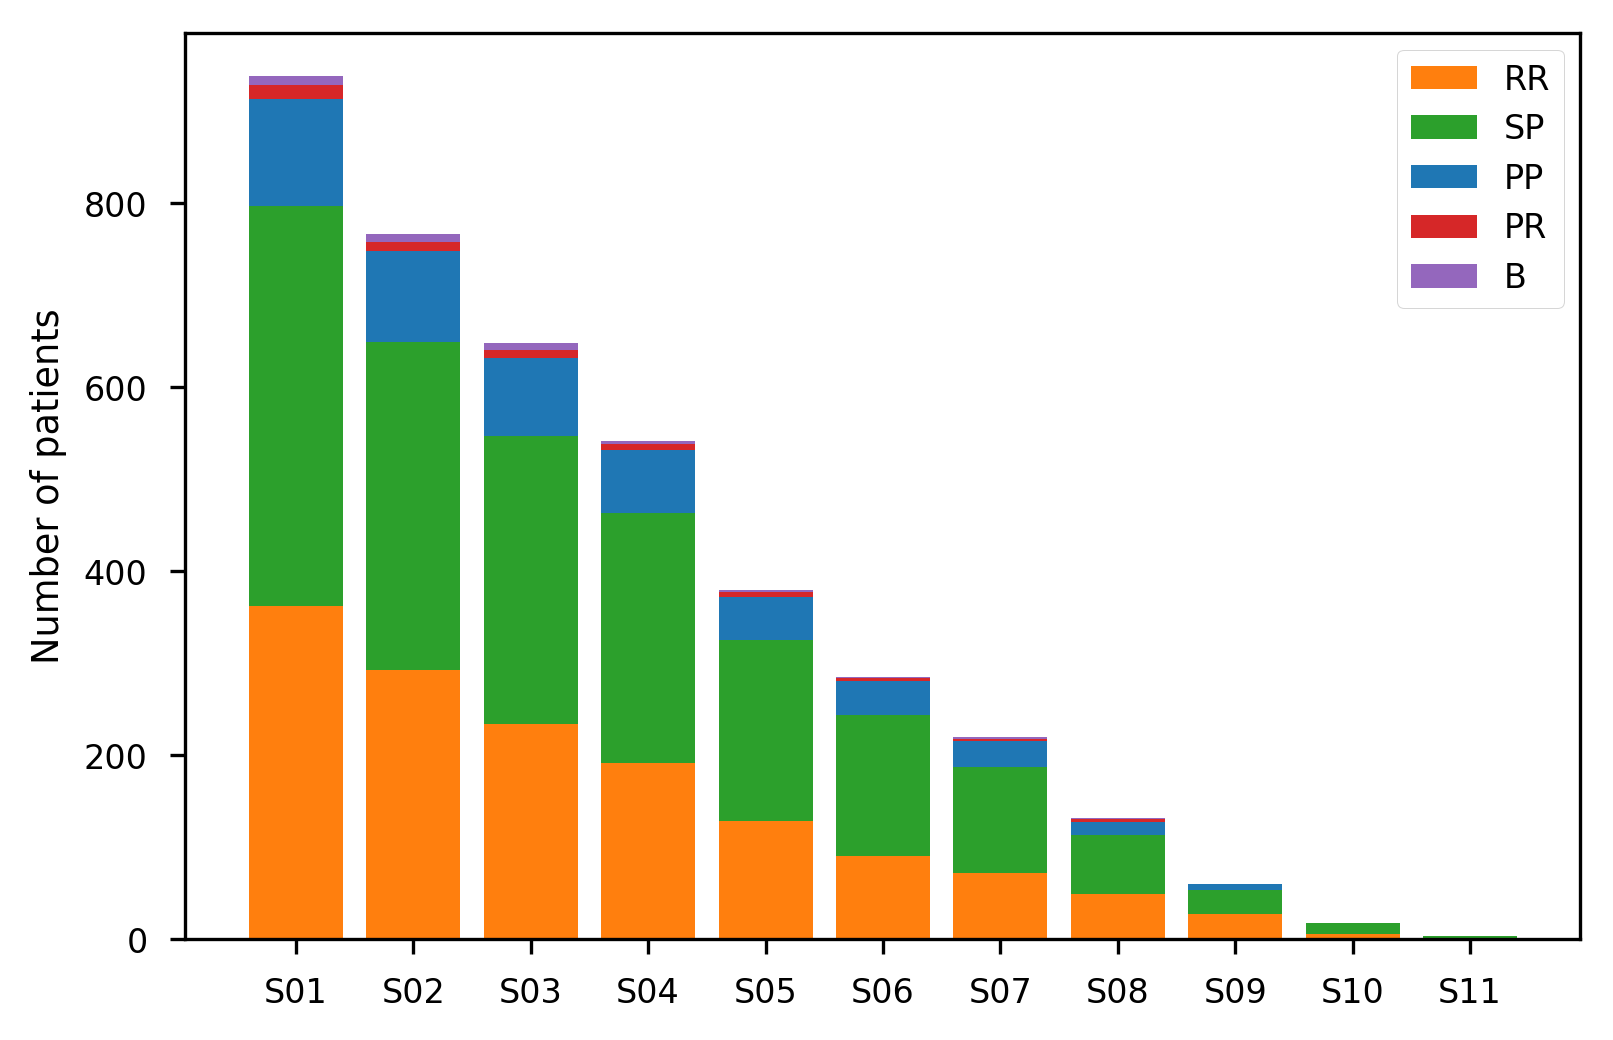

In [17]:
colors = {'RR': 'C1', 'SP': 'C2', 'PR': 'C3', 'PP': 'C0', 'B': 'C4'}

xaxis = np.arange(1, df.shape[0]+1)

plt.figure(dpi=300)

plt.bar(xaxis, df['RR'], label='RR', color=colors['RR'])
plt.bar(xaxis, df['SP'], bottom=df['RR'], label='SP', color=colors['SP'])
plt.bar(xaxis, df['PP'], bottom=df['RR']+df['SP'], label='PP', color=colors['PP'])
plt.bar(xaxis, df['PR'], bottom=df['RR']+df['SP']+df['PP'], label='PR', color=colors['PR'])
plt.bar(xaxis, df['B'],  bottom=df['RR']+df['SP']+df['PP']+df['PR'], label='B', color=colors['B'])


plt.legend(loc=1)
plt.xticks(xaxis, df.index)
plt.ylabel('Number of patients')
plt.savefig('../../images/ms_bars.png');

## Pie chart of the courses

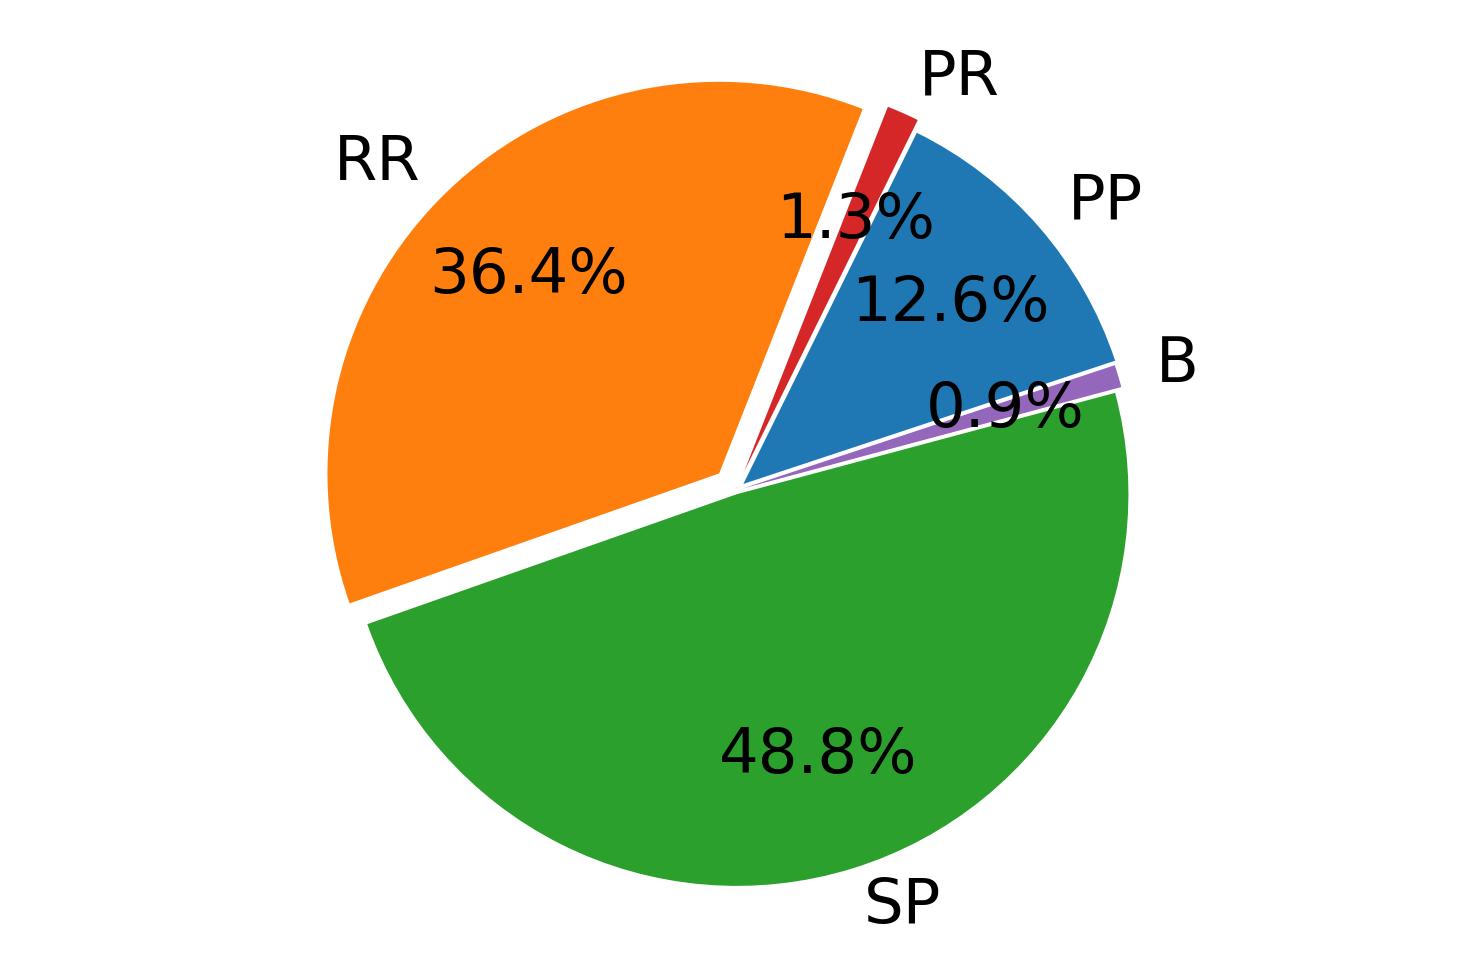

In [18]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
slices = sorted(df.columns)
sizes = df.sum(axis=0)[slices].values
explode = 0.1*np.random.rand(df.shape[1])

fig1, ax1 = plt.subplots(dpi=300)
_, texts, _ = ax1.pie(sizes, explode=explode, labels=slices, colors=[colors[s] for s in slices],
                      autopct='%1.1f%%', shadow=False, startangle=15, textprops={'fontsize': 15},
                      pctdistance=0.7)
map(lambda x: x.set_fontsize(15), texts)
ax1.axis('equal')

plt.savefig('../../images/ms_pie.png');

## Impute missing values

In [19]:
from fancyimpute import KNN
data = pd.DataFrame(data=KNN(k=3).complete(data.values),
                    index=data.index, columns=data.columns)

Imputing row 1/3991 with 13 missing, elapsed time: 9.858
Imputing row 101/3991 with 0 missing, elapsed time: 9.874
Imputing row 201/3991 with 0 missing, elapsed time: 9.879
Imputing row 301/3991 with 1 missing, elapsed time: 9.882
Imputing row 401/3991 with 3 missing, elapsed time: 9.886
Imputing row 501/3991 with 2 missing, elapsed time: 9.891
Imputing row 601/3991 with 3 missing, elapsed time: 9.896
Imputing row 701/3991 with 1 missing, elapsed time: 9.906
Imputing row 801/3991 with 1 missing, elapsed time: 9.913
Imputing row 901/3991 with 0 missing, elapsed time: 9.923
Imputing row 1001/3991 with 0 missing, elapsed time: 9.929
Imputing row 1101/3991 with 0 missing, elapsed time: 9.942
Imputing row 1201/3991 with 0 missing, elapsed time: 9.947
Imputing row 1301/3991 with 4 missing, elapsed time: 9.950
Imputing row 1401/3991 with 2 missing, elapsed time: 9.954
Imputing row 1501/3991 with 1 missing, elapsed time: 9.961
Imputing row 1601/3991 with 0 missing, elapsed time: 9.964
Imputing

## One-hot-encode categorical features

In [20]:
from sklearn.preprocessing import OneHotEncoder

def flatten(x):
    """Flatten a list."""
    return [y for l in x for y in flatten(l)] if type(x) in (list, np.ndarray) else [x]

ohe = OneHotEncoder(sparse=False, n_values=3)
edi_items = filter(lambda x: x.startswith('EDINB0'), data.columns)
ohe_edi_items = flatten([[x+'_0', x+'_1', x+'_2'] for x in edi_items])

xx = data[edi_items].values
xx[np.where(xx == -2.0)] = 1.0
xx = ohe.fit_transform(xx)

data = pd.concat([data.drop(edi_items, axis=1),
                  pd.DataFrame(xx, columns=ohe_edi_items, index=data.index)],
                axis=1)

In [21]:
data.shape

(3991, 165)

## Features distribution boxplot

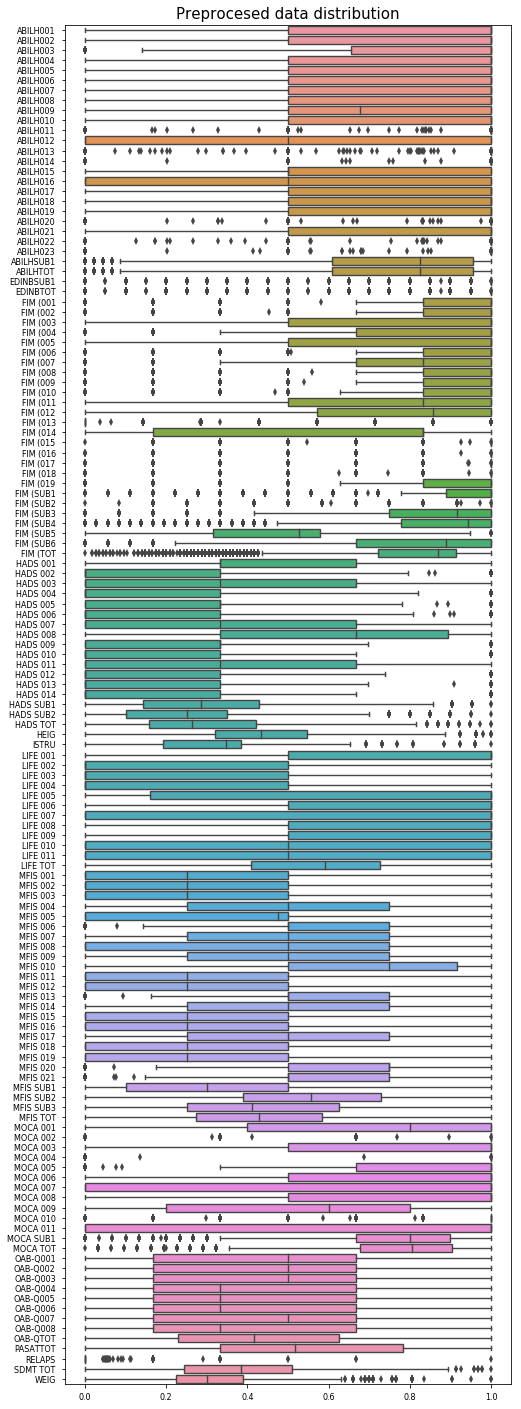

In [25]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

cols = data.columns.drop(ohe_edi_items)

ss = MinMaxScaler()
ss_data = pd.DataFrame(ss.fit_transform(data[cols].values),
                       columns=data[cols].columns, index=data.index)

plt.figure(figsize=(8, 25))
sns.boxplot(data=ss_data, orient='h')
plt.title('Preprocesed data distribution', fontsize=15)
plt.savefig('../../images/ms_mm_boxplot.png');

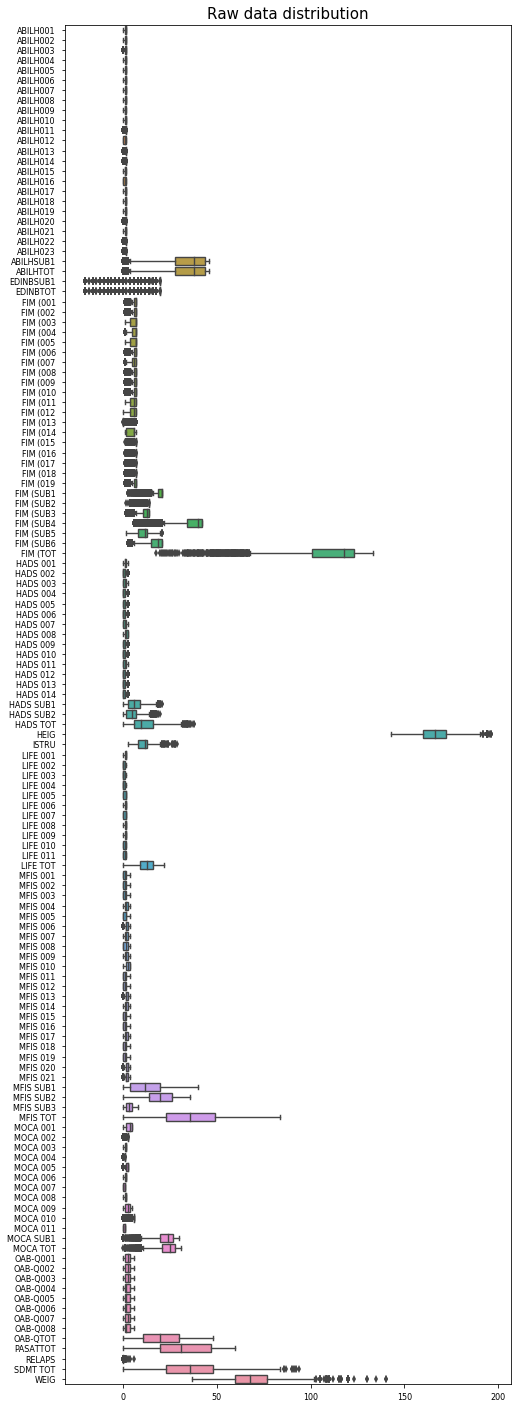

In [421]:
plt.figure(figsize=(8, 25))
sns.boxplot(data=data[cols], orient='h')
plt.title('Raw data distribution', fontsize=15)
plt.savefig('../../images/ms_raw_boxplot.png');

## Outliers detection

In [26]:
# Remove outliers
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import StratifiedShuffleSplit

# Fit the isolation forest
od = IsolationForest(n_estimators=1000, n_jobs=-1, contamination=0.1)
od.fit(data)

IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=1000, n_jobs=-1,
        random_state=None, verbose=0)

In [27]:
inliners = np.where(od.predict(data)>0)[0]
data_inliers, labels_inliers = data.iloc[inliners], labels.iloc[inliners]

In [28]:
print('{} outliers'.format(data.shape[0] - len(inliners)))

400 outliers


## Perform dimensionality reduction and visualization

In [32]:
import os
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, MDS, TSNE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from mpl_toolkits.mplot3d import Axes3D

def dataviz(method, data, labels, filename=None):
    """Perform dimensionality reduction and data visualization."""
    method.set_params(n_components=3)
    
    # Create pipeline
    manifold = Pipeline([['preproc', StandardScaler()],
                         ['dataviz', method]])
    
    # Randomly extract the some% of the samples to visualize
    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=0)
    _, _idx = next(sss.split(data.values, labels.values))
    _data, _labels = data.values[_idx, :], labels.values[_idx]
    
    if hasattr(method, 'transform'):
        # Fit the manifold learning on the whole dataset
        manifold.fit(data.values)

        # And transform a small fraction of data for dataviz purposes
        data_r = manifold.transform(_data)
    else:
        data_r = manifold.fit_transform(_data)
    
    # Save 3D scatterplot
    if filename is not None:
        _filename = os.path.join('..', '..', 'images', filename+'.png')
        print('Generating & saving {} ...'.format(_filename))
        
        fig = plt.figure(dpi=300)
        ax = fig.add_subplot(111, projection='3d')

        for l in np.unique(_labels):
            idx = np.where(_labels == l)[0]
            ax.scatter(data_r[idx, 0], data_r[idx, 1], data_r[idx, 2], 
                       c=colors[l], label=l)
        plt.legend(ncol=2)
        ax.set_xlabel(r'$x_1$')
        ax.set_ylabel(r'$x_2$')
        ax.set_zlabel(r'$x_3$')
        
        # Define method name
        name = filename.split('_')[1]
        name = name.upper() if len(name)<5 else name[0].upper()+name[1:]
    
        plt.title('3D data visualization with {}'.format(name))
        plt.tight_layout()
        plt.savefig(_filename)

Generating & saving ms_pca.png ...
ms_pca done
Generating & saving ms_isomap.png ...
ms_isomap done
Generating & saving ms_mds.png ...
ms_mds done
Generating & saving ms_tsne.png ...
ms_tsne done


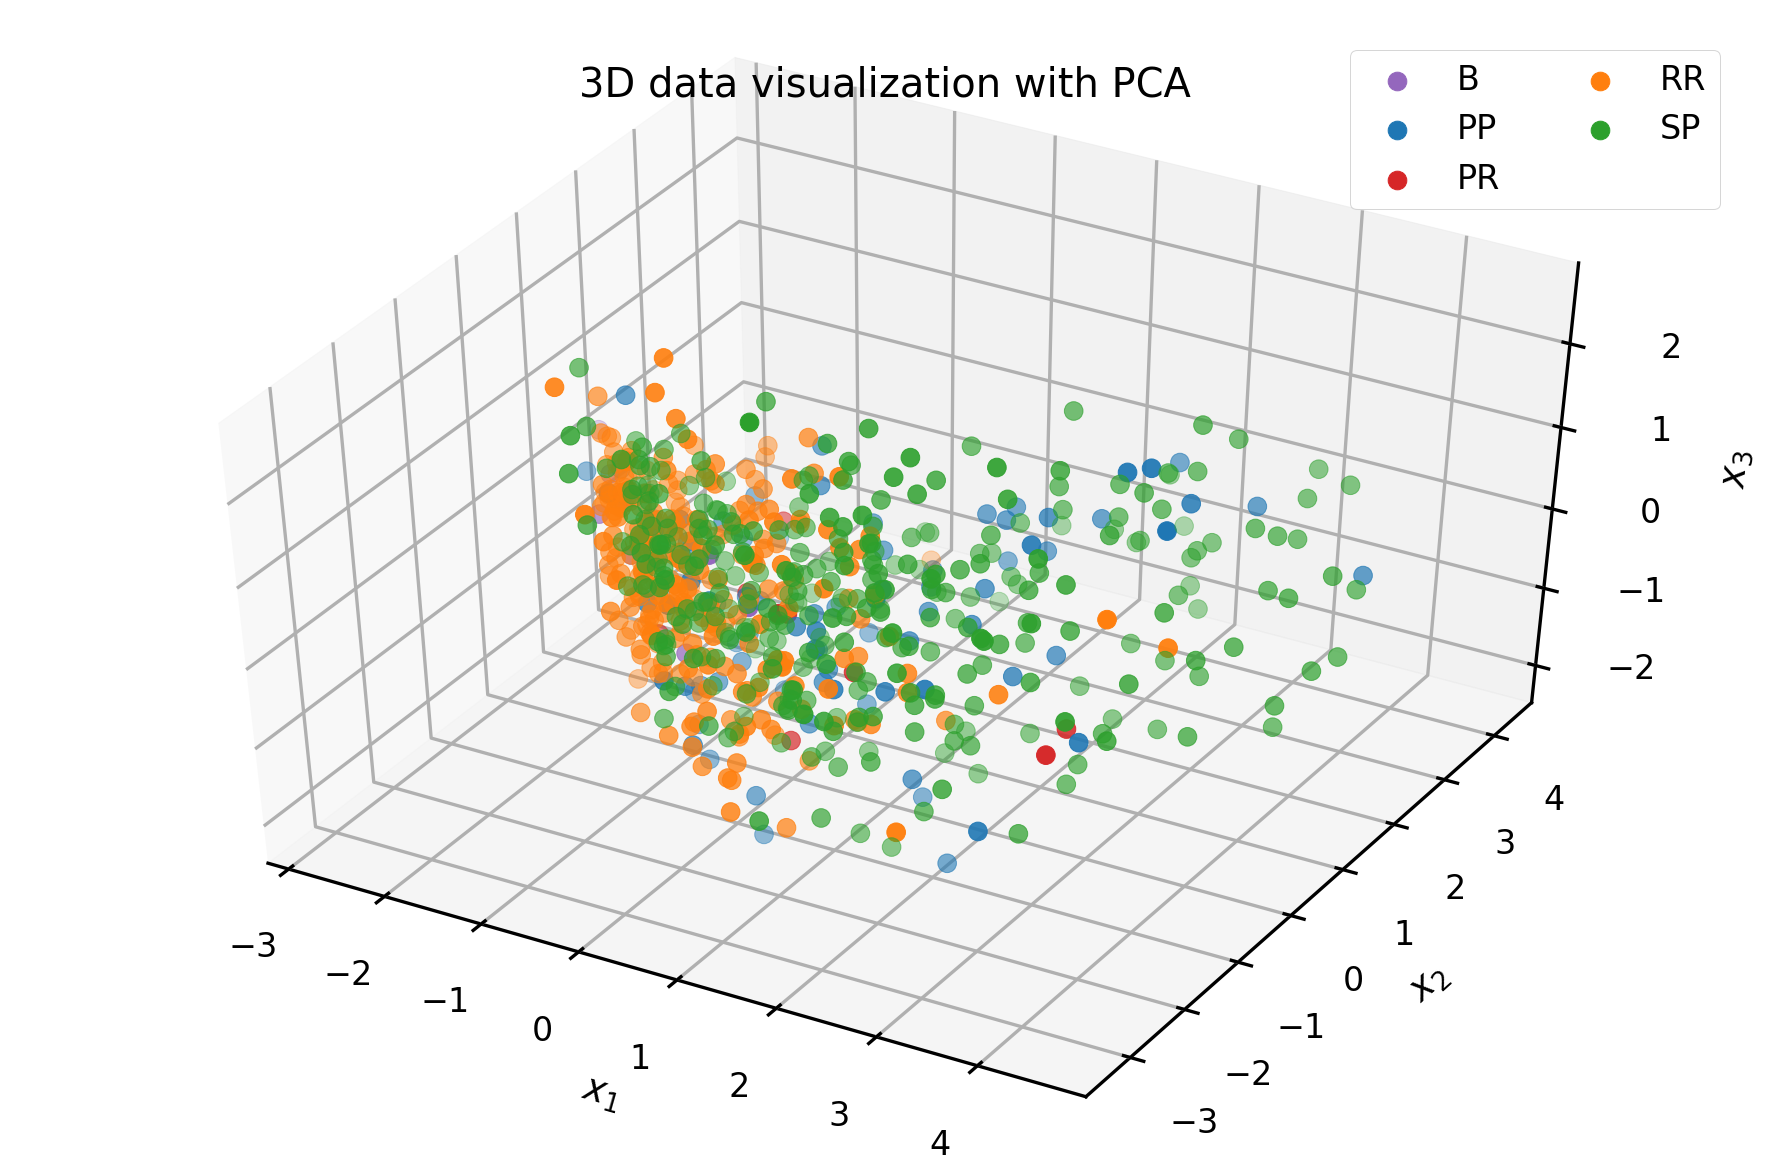

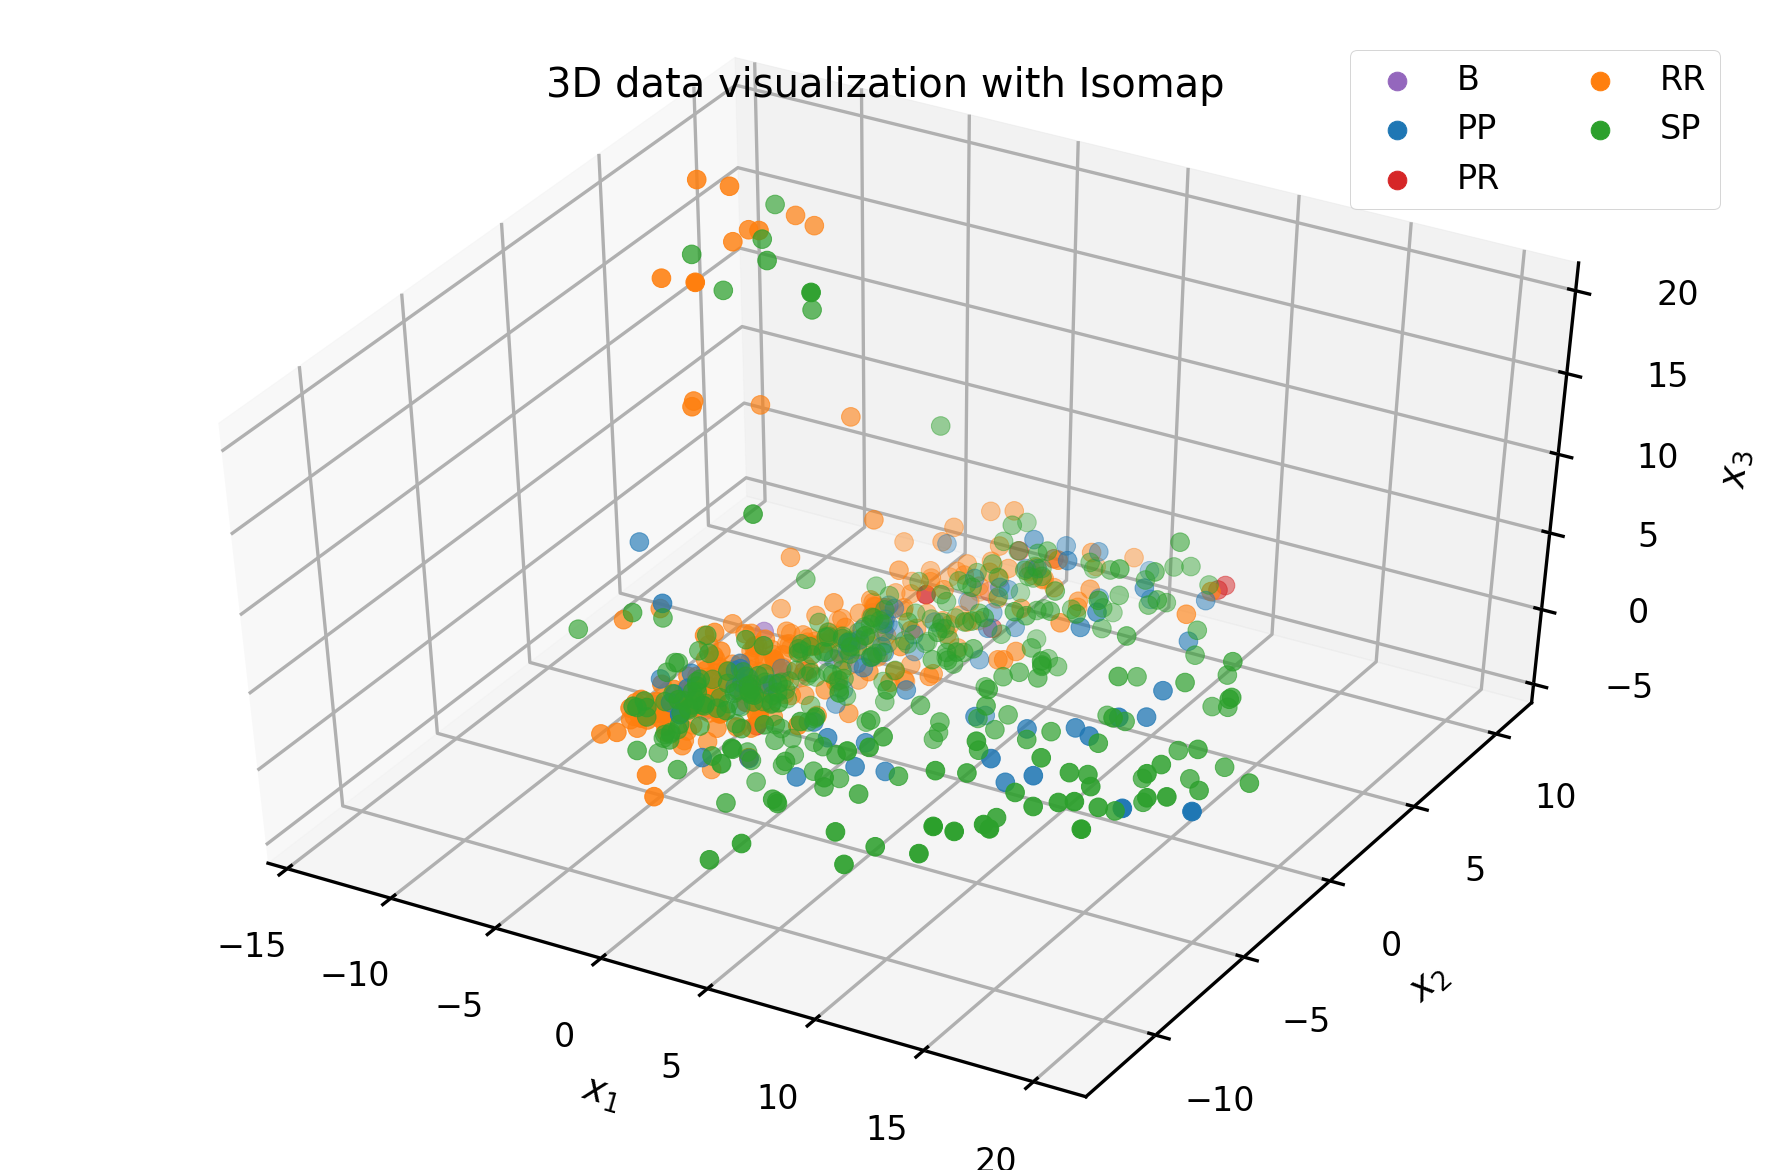

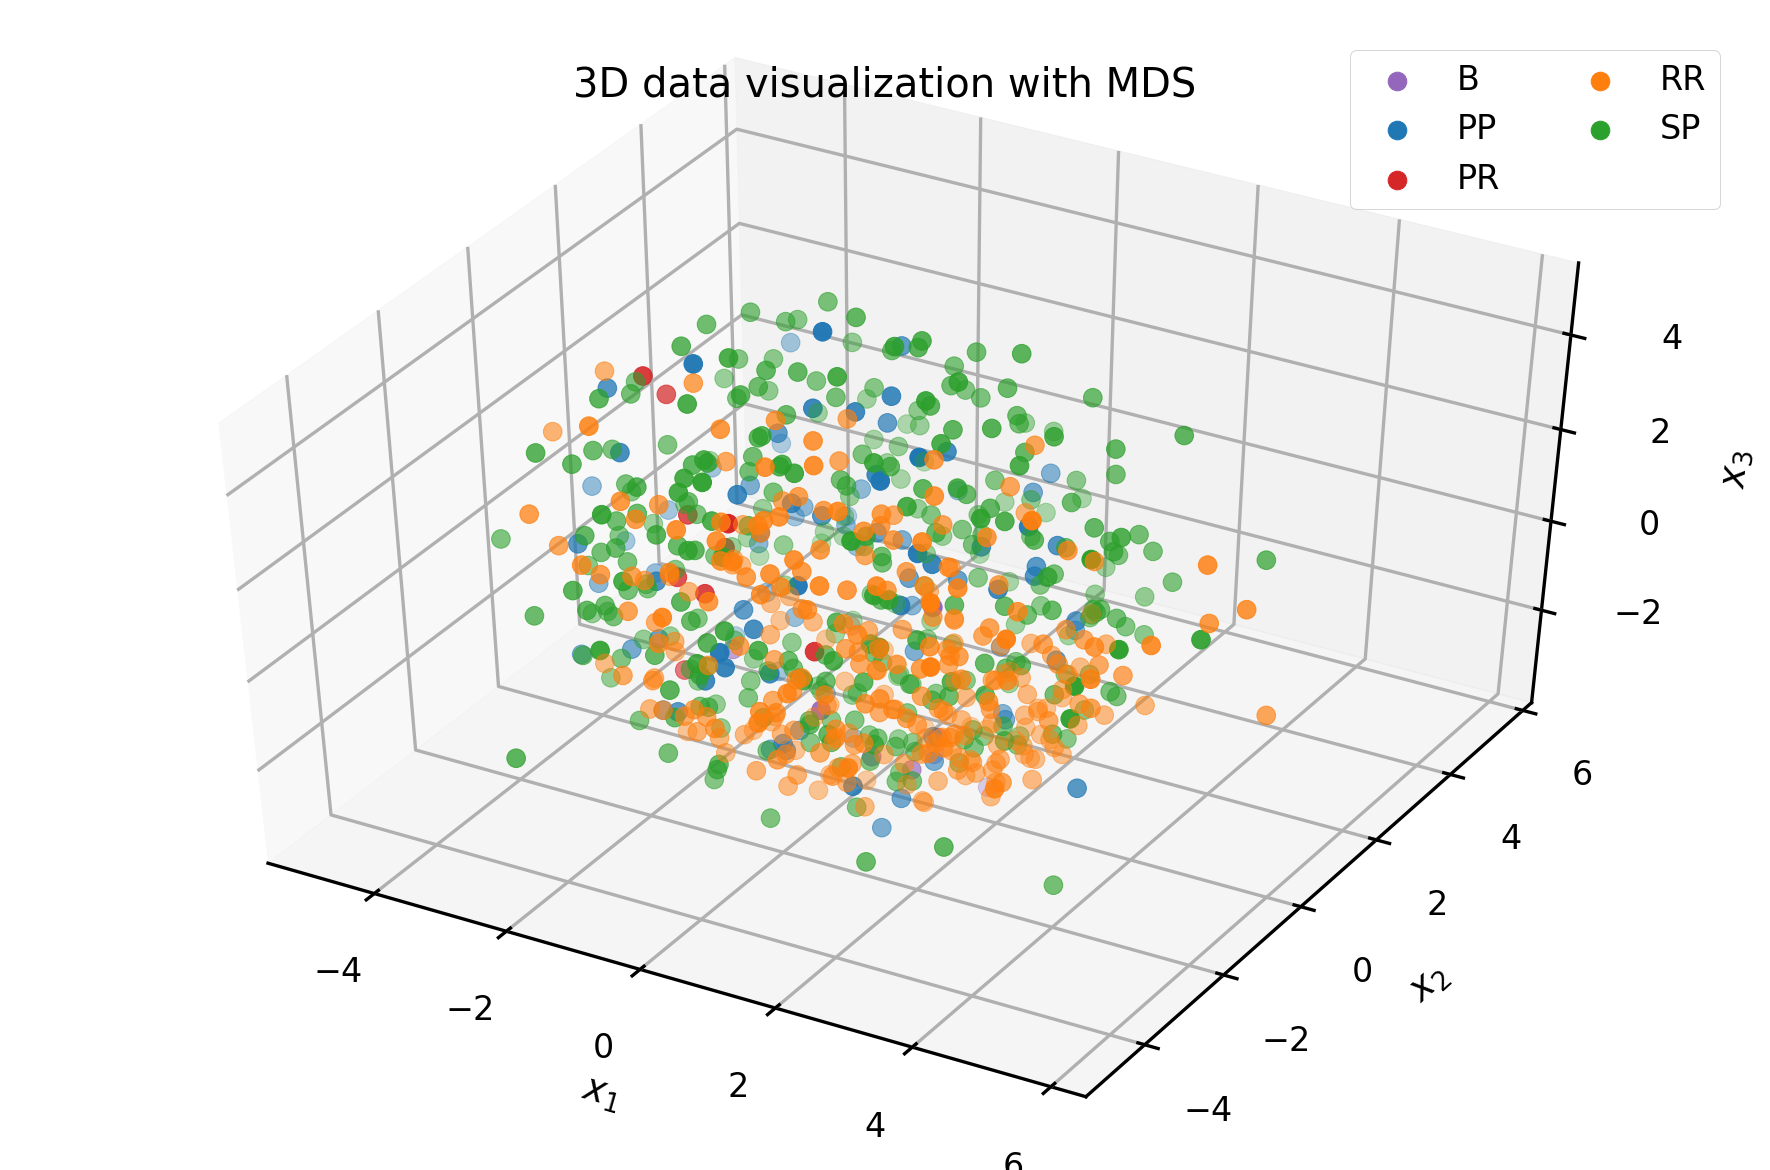

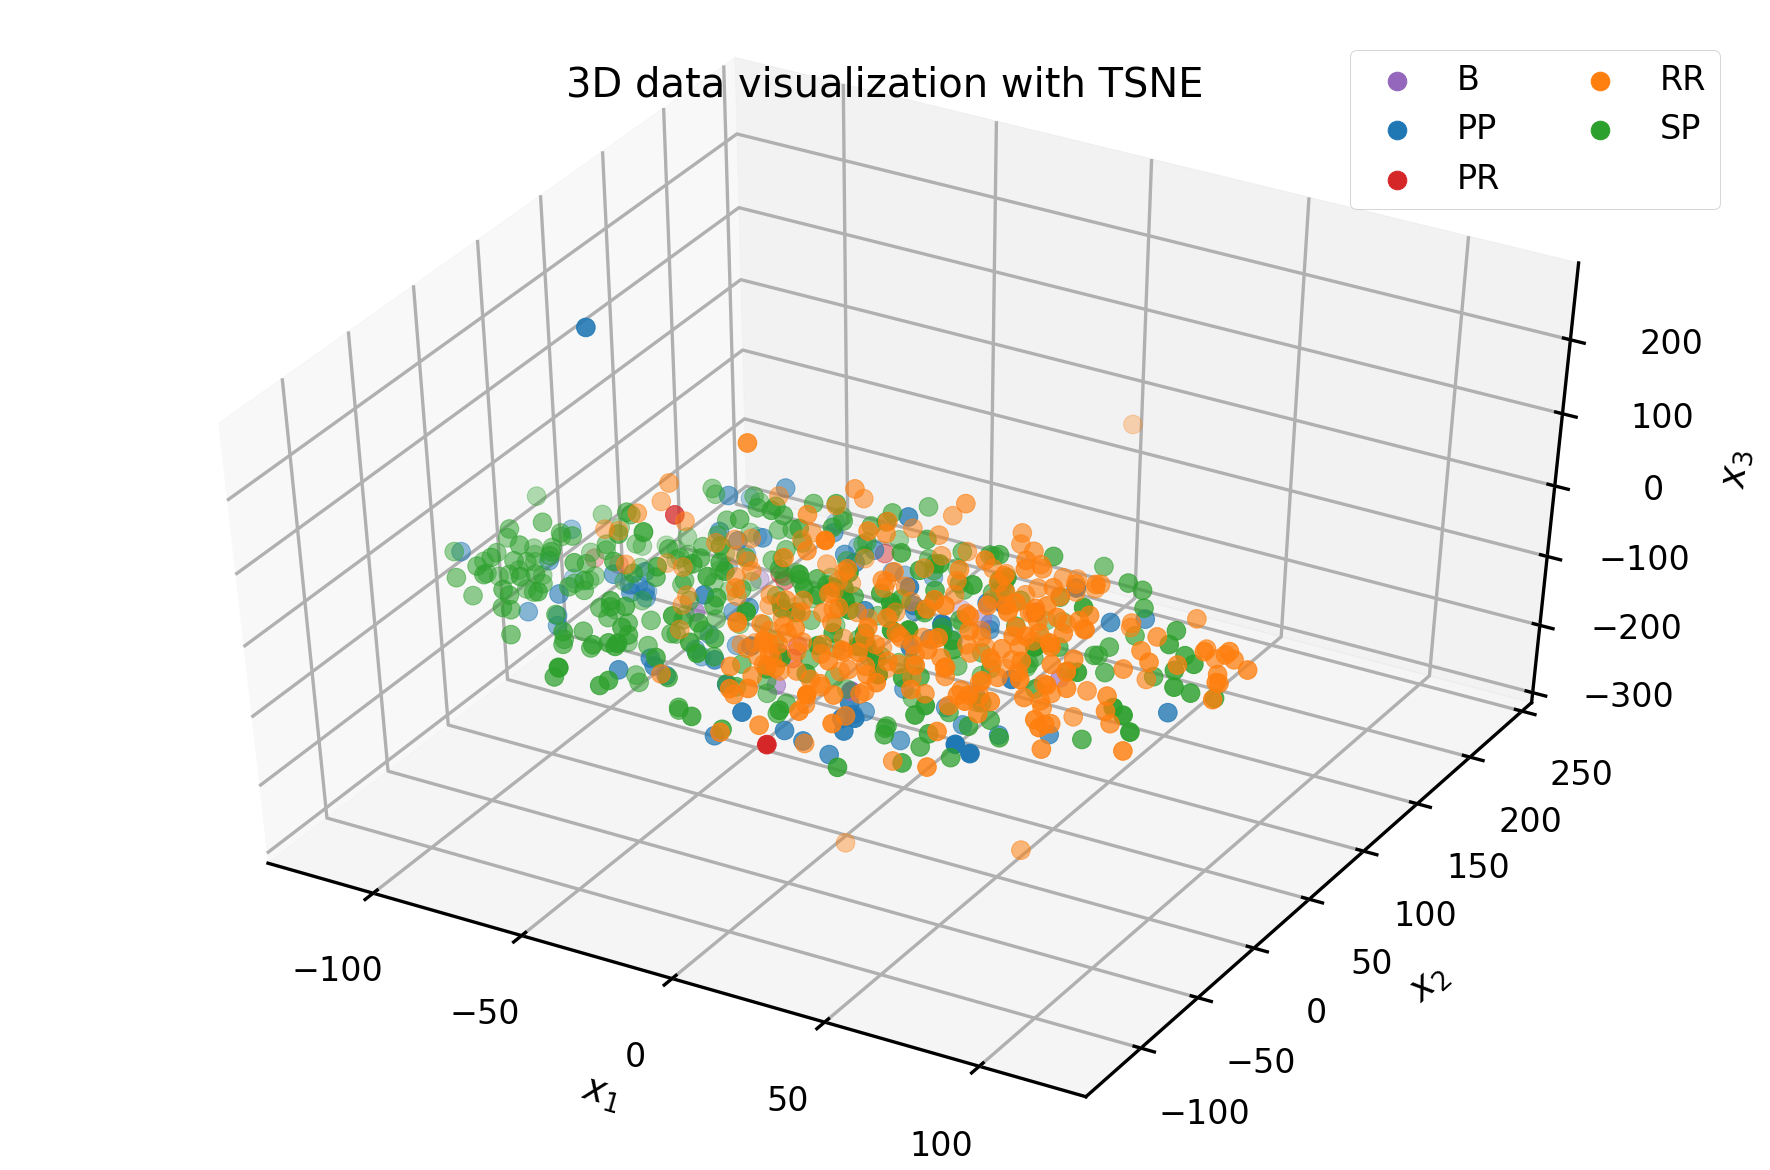

In [33]:
methods = [PCA(), Isomap(), MDS(n_jobs=-1), TSNE(perplexity=12)]
filenames = ['ms_pca', 'ms_isomap', 'ms_mds', 'ms_tsne']

for method, filename in zip(methods, filenames):
    dataviz(method, data_inliers, labels_inliers, filename)
    print('{} done'.format(filename))

In [429]:
# Plot PCA explained variance
manifold = Pipeline([['preproc', StandardScaler()],
                     ['dataviz', PCA(n_components=50)]])
manifold.fit(data_inliers.values)

Pipeline(memory=None,
     steps=[('preproc', StandardScaler(copy=True, with_mean=True, with_std=True)), ['dataviz', PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)]])

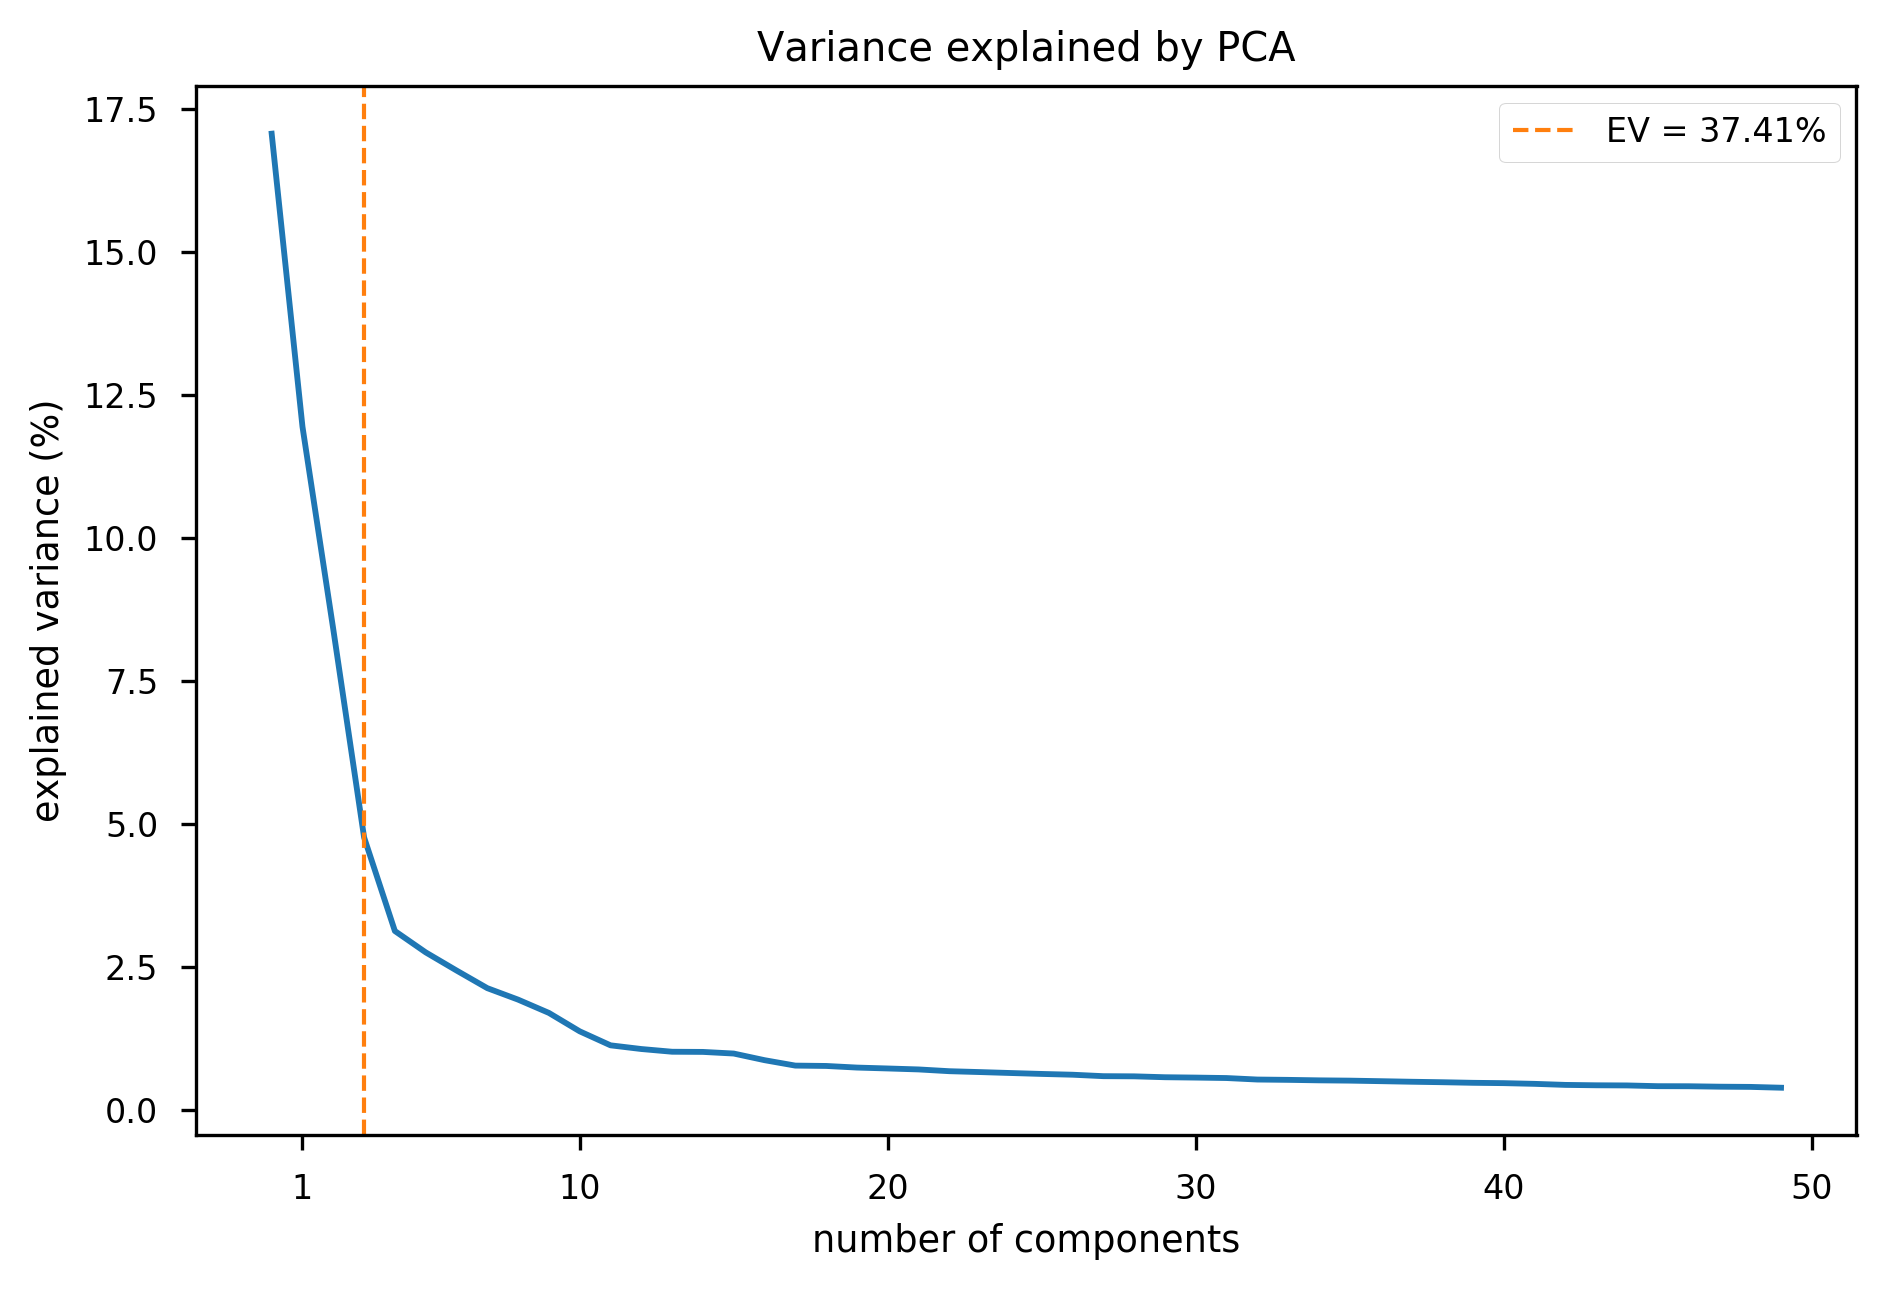

In [430]:
plt.figure(dpi=300)
evr = manifold.steps[1][1].explained_variance_ratio_
plt.plot(100*evr)
plt.axvline(3, linestyle='--', linewidth=1, color='C1',
            label='EV = {:.2f}%'.format(100*np.sum(evr[:3])))
plt.xticks([1, 10, 20, 30, 40, 50], [1, 10, 20, 30, 40, 50])
plt.xlabel('number of components')
plt.ylabel('explained variance (%)')
plt.title('Variance explained by PCA')
plt.legend()

plt.tight_layout()
plt.savefig('../../images/ms_evr_pca.png');